This notbook plots the BH-mass realation and distribution of blackhole mass

In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import pandas as pd
from tqdm import tqdm


#importing glob for filepaths
import glob

In [2]:
# getting the file paths for snap = 15-28 hdf5 files
f_15 = glob.glob("BH/*s15.hdf5")
f_16 = glob.glob("BH/*s16.hdf5")
f_17 = glob.glob("BH/*s17.hdf5")
f_18 = glob.glob("BH/*s18.hdf5")
f_19 = glob.glob("BH/*s19.hdf5")
f_20 = glob.glob("BH/*s20.hdf5")
f_21 = glob.glob("BH/*s21.hdf5")
f_22 = glob.glob("BH/*s22.hdf5")
f_23 = glob.glob("BH/*s23.hdf5")
f_24 = glob.glob("BH/*s24.hdf5")
f_25 = glob.glob("BH/*s25.hdf5")
f_26 = glob.glob("BH/*s26.hdf5")
f_27 = glob.glob("BH/*s27.hdf5")
f_28 = glob.glob("BH/*s28.hdf5")

In [3]:

Master_relation = []

for z_path in (f_15, f_16, f_17, f_18, f_19, f_20, f_21, f_22, f_23, f_24, f_25, f_26, f_27, f_28):
    BH_Mdot = []; BH_mass = []
    for name in z_path:
        f = h5.File(name, 'r')
        BH_Mdot.append(f['Relation/BH_Mdot'][:])
        BH_mass.append(f['Relation/BH_mass'][:])
        f.close()
        
    # concatenating the data
    Master_relation.append([BH_mass, BH_Mdot])

In [4]:
Master_distribution = []

for z_path in (f_15, f_16, f_17, f_18, f_19, f_20, f_21, f_22, f_23, f_24, f_25, f_26, f_27, f_28):
    bins = []; hist = []
    for name in z_path:
        f = h5.File(name, 'r')
        bins.append(f['Distribution/bins'][:])
        hist.append(f['Distribution/hist'][:])
        f.close()
        
    # concatenating the data
    Master_distribution.append([bins, hist])

In [5]:
z_vals = [2.012, 1.74, 1.49, 1.26, 1.0, 0.87, 0.74, 0.62, 0.5, 0.37, 0.27, 0.18, 0.1, 0.0]

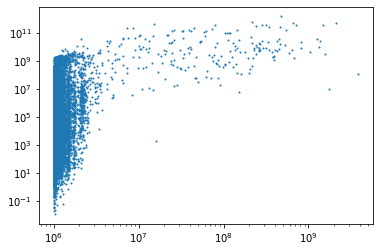

In [6]:
# plotting the relation

plt.scatter(10e10*Master_relation[0][0][0][:], 10e10*Master_relation[0][1][0][:],s=1, label = 's15')
plt.xscale('log')
plt.yscale('log')

The data is very noisy to deduce any possible relation. for that matter, we need to filter the data.

In [10]:
# we bin the BH_mass to have 1000 bins and then we compute the mean and standard deviation of the BH_Mdot for each bin

Master_relation_filtered = []

#looping over z values
for i in range(len(Master_relation)):
    BH_mass_binned = []; BH_Mdot_binned = []; BH_Mdot_error = []; BH_mass_error = []
    # looping over the components
    for j in range(2):
        guess_nbins = int(len(Master_relation[i][0][j])/100)
        # computing the optimal number of bins
        nbins = np.arange(np.min(Master_relation[i][0][j]), np.max(Master_relation[i][0][j]), (np.max(Master_relation[i][0][j])-np.min(Master_relation[i][0][j]))/guess_nbins)
        ## binning the mass to have mean mass of BH for a given bin
        # computing the mean Mdot for each bin
        n_BH, BH_mass_edges = np.histogram(Master_relation[i][0][j], bins=nbins)
        
        BH_mass_binned_temp = np.empty(len(n_BH))
        for k in range(len(BH_mass_edges)-1):
            BH_mass_binned_temp[k] = (BH_mass_edges[k]+BH_mass_edges[k+1])/2

        ## binning the Mdot to have mean Mdot for a given bin
        # computing number of BH in each bin
        BH_Mdot_binned_temp = np.empty(len(nbins)-1)
        BH_Mdot_error_temp  = np.empty(len(nbins)-1)
        for k in range(len(nbins)-1):
            BH_Mdot_binned_temp[k] = np.mean(Master_relation[i][1][j][k:k+n_BH[k]]*10e10)
            BH_Mdot_error_temp[k]  =  np.std(Master_relation[i][1][j][k:k+n_BH[k]]*10e10)
        
        # appending
        BH_mass_binned.append(BH_mass_binned_temp)
        BH_Mdot_binned.append(BH_Mdot_binned_temp)
        BH_Mdot_error.append(BH_Mdot_error_temp)

    Master_relation_filtered.append([BH_mass_binned, BH_Mdot_binned, BH_Mdot_error])

c:\Users\bipra\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\bipra\miniconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\bipra\miniconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\bipra\miniconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\bipra\miniconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


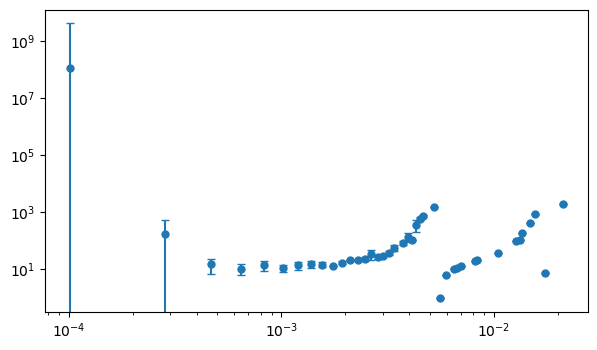

In [12]:
plt.figure(figsize=(7,4), dpi=100)
plt.errorbar(Master_relation_filtered[0][0][0][:], Master_relation_filtered[0][1][0][:], 
                yerr=Master_relation_filtered[0][2][0][:],
                lw=1.5, capsize=3, marker='o',ms=5, ls='None')
plt.xscale('log')
plt.yscale('log')

In [9]:
# printing number of blackholes at each epoch
for i in range(len(Master_relation)):
    print("N_BH: ", len(Master_relation[i][0][0][:]), "\t\tReduced points", int(len(Master_relation[i][0][0][:])/100))

N_BH:  21288 		Reduced points 212
N_BH:  22874 		Reduced points 228
N_BH:  24611 		Reduced points 246
N_BH:  26233 		Reduced points 262
N_BH:  28195 		Reduced points 281
N_BH:  29312 		Reduced points 293
N_BH:  30559 		Reduced points 305
N_BH:  31698 		Reduced points 316
N_BH:  33040 		Reduced points 330
N_BH:  34852 		Reduced points 348
N_BH:  36227 		Reduced points 362
N_BH:  37792 		Reduced points 377
N_BH:  39221 		Reduced points 392
N_BH:  40828 		Reduced points 408


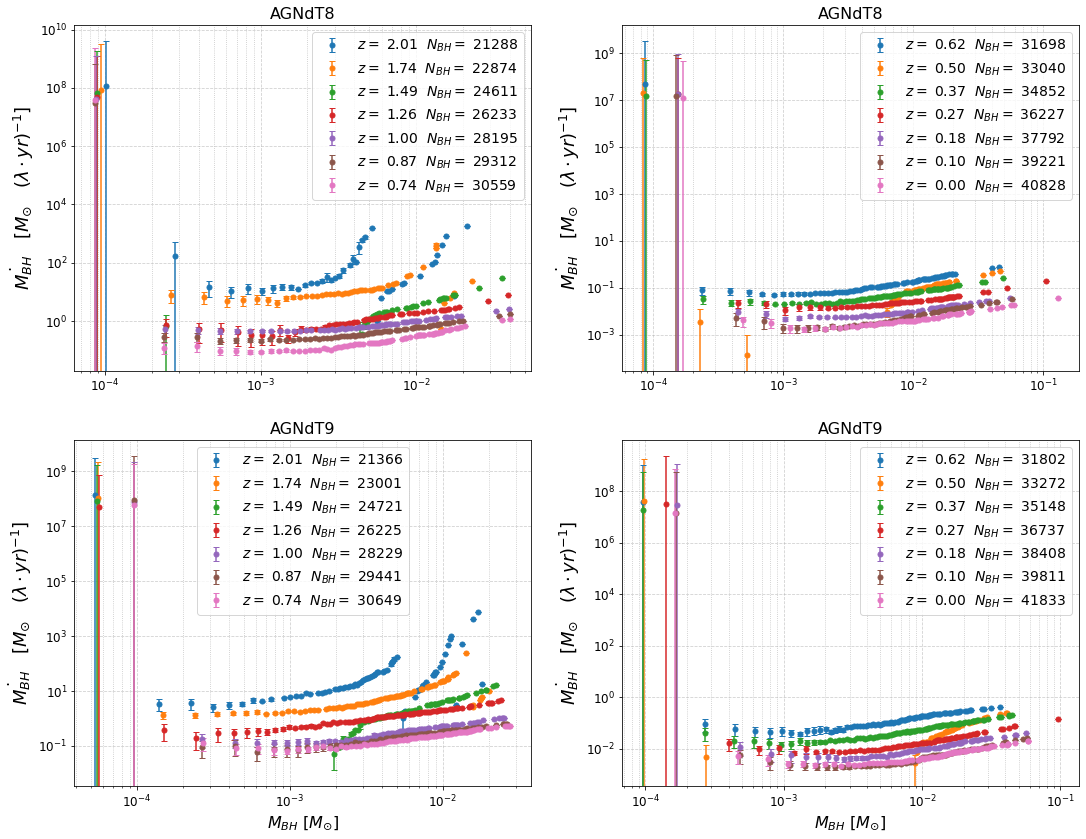

In [18]:
# creting a master plot with four subplots, 2 for each model

fig, ax = plt.subplots(2,2, figsize=(18,14))

for j in range(2):
    for i in range(7):
        # net count to track the index
        idx = j*7 + i
        ax[0,j].errorbar(Master_relation_filtered[idx][0][0][:], Master_relation_filtered[idx][1][0][:], 
                yerr=Master_relation_filtered[idx][2][0][:],
                lw=1.5, capsize=3, marker='o',ms=5, ls='None',
                label = '$z=$ %2.2f  $N_{BH}=$ %d' %(z_vals[idx], len(Master_relation[idx][0][0][:])))

        ax[1,j].errorbar(Master_relation_filtered[idx][0][1][:], Master_relation_filtered[idx][1][1][:], 
                yerr=Master_relation_filtered[idx][2][1][:], 
                lw=1.5, capsize=3, marker='o',ms=5, ls='None',
                label = '$z=$ %2.2f  $N_{BH}=$ %d' %(z_vals[idx], len(Master_relation[idx][0][1][:])))

for i in range(2):
        for j in range(2):
                ax[i,j].set_xscale('log')
                ax[i,j].set_yscale('log')
                ax[i,j].legend(fontsize=14)
                # increasing the fontsize of the ticks
                ax[i,j].tick_params(labelsize=12)
                # adding major and minor gridlines
                ax[i,j].grid(which='major', linestyle='--', alpha=0.6)
                ax[i,j].grid(which='minor', linestyle=':', alpha=0.8)
                # adding labels to axis
                ax[i,j].set_ylabel('$\\dot{M_{BH}}$ \t [$M_{\odot}$   $(\\lambda\\cdot yr)^{-1}$]', fontsize=18)
                if i==1:
                        ax[i,j].set_xlabel('$M_{BH}$ [$M_{\odot}$]', fontsize=16)

ax[0,0].set_title('AGNdT8', fontsize=16);
ax[0,1].set_title('AGNdT8', fontsize=16);
ax[1,0].set_title('AGNdT9', fontsize=16);
ax[1,1].set_title('AGNdT9', fontsize=16);

plt.savefig('Plots/Fine_BH_Relation.jpg', dpi=150, bbox_inches='tight')

The above plot is only for AGNdT8 and AGNdT9. We might also be interested in same for much larger time-steps and ViscHi and ViscLo as well.

In [11]:
# getting the file paths for s=8,12,15,19,23,28 hdf5 files
f_08   = glob.glob('coarse/*s08.hdf5')
f_12   = glob.glob('coarse/*s12.hdf5')
f_15   = glob.glob('coarse/*s15.hdf5')
f_19   = glob.glob('coarse/*s19.hdf5')
f_23   = glob.glob('coarse/*s23.hdf5')
f_28   = glob.glob('coarse/*s28.hdf5')

z_vals_c = [5.04, 3.02, 2.01, 1.0, 0.5, 0.0]


In [12]:
Master_relation_C = []

for z_path in (f_08, f_12, f_15, f_19, f_23, f_28):
    BH_Mdot = []; BH_mass = []
    for name in z_path:
        f = h5.File(name, 'r')
        BH_Mdot.append(f['Relation/BH_Mdot'][:])
        BH_mass.append(f['Relation/BH_mass'][:])
        f.close()
        
    # concatenating the data
    Master_relation_C.append([BH_mass, BH_Mdot])

In [13]:
# filtering the data

# we bin the BH_mass to have 1000 bins and then we compute the mean and standard deviation of the BH_Mdot for each bin

Master_relation_C_filtered = []

#looping over z values
for i in range(len(Master_relation_C)):
    BH_mass_binned = []; BH_Mdot_binned = []; BH_Mdot_error = []
    # looping over the components
    for j in range(4):
        guess_nbins = int(len(Master_relation_C[i][0][j])/50)
        # computing the optimal number of bins
        nbins = np.arange(np.min(Master_relation_C[i][0][j]), np.max(Master_relation_C[i][0][j]), (np.max(Master_relation_C[i][0][j])-np.min(Master_relation_C[i][0][j]))/guess_nbins)
        ## binning the mass to have mean mass of BH for a given bin
        # computing the mean Mdot for each bin
        n_BH, BH_mass_edges = np.histogram(Master_relation_C[i][0][j], bins=nbins)
        
        BH_mass_binned_temp = np.empty(len(n_BH))
        for k in range(len(BH_mass_edges)-1):
            BH_mass_binned_temp[k] = ((BH_mass_edges[k] + BH_mass_edges[k+1])/2)*10e10

        ## binning the Mdot to have mean Mdot for a given bin
        # computing number of BH in each bin
        BH_Mdot_binned_temp = np.empty(len(nbins)-1)
        BH_Mdot_error_temp  = np.empty(len(nbins)-1)
        for k in range(len(nbins)-1):
            BH_Mdot_binned_temp[k] = np.mean(Master_relation_C[i][1][j][k:k+n_BH[k]]*10e10)
            BH_Mdot_error_temp[k]  =  np.std(Master_relation_C[i][1][j][k:k+n_BH[k]]*10e10)
        
        # appending
        BH_mass_binned.append(BH_mass_binned_temp)
        BH_Mdot_binned.append(BH_Mdot_binned_temp)
        BH_Mdot_error.append(BH_Mdot_error_temp)

    Master_relation_C_filtered.append([BH_mass_binned, BH_Mdot_binned, BH_Mdot_error])

In [14]:
np.shape(Master_relation_C_filtered)

c:\Users\bipra\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(6, 3, 4)

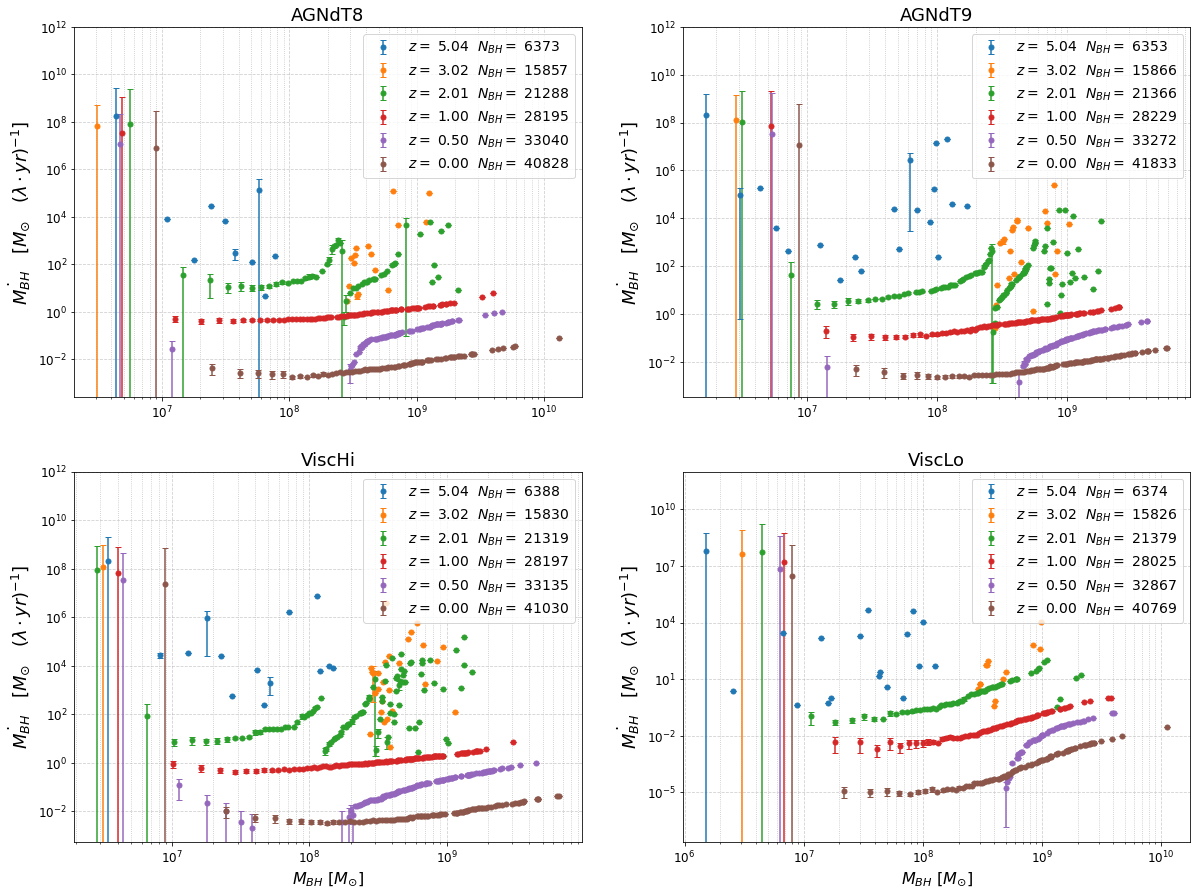

In [15]:
# creting a master plot with four subplots, 2 for each model

fig, ax = plt.subplots(2,2, figsize=(20,15))
from matplotlib import ticker

for i in range(2):
        for j in range(2):
            # index to get component
            idx_m = i*2 + j
            for idx in range(6):
                ax[i,j].errorbar(Master_relation_C_filtered[idx][0][idx_m][:], Master_relation_C_filtered[idx][1][idx_m][:], 
                            yerr=Master_relation_C_filtered[idx][2][idx_m][:],
                            lw=1.5, capsize=3, marker='o',ms=5, ls='None',
                            label = '$z=$ %2.2f  $N_{BH}=$ %d' %(z_vals_c[idx], len(Master_relation_C[idx][0][idx_m][:])))

            ax[i,j].set_xscale('log')
            ax[i,j].set_yscale('log')
            ax[i,j].set_ylim(top=10e11)
            ax[i,j].legend(fontsize=14)
            # increasing the fontsize of the ticks
            ax[i,j].tick_params(labelsize=12)

            # adding major and minor gridlines
            ax[i,j].grid(which='major', linestyle='--', alpha=0.6)
            ax[i,j].grid(which='minor', linestyle=':', alpha=0.8)
            # adding labels to axis
            ax[i,j].set_ylabel('$\\dot{M_{BH}}$ \t [$M_{\odot}$   $(\\lambda\\cdot yr)^{-1}$]', fontsize=18)
            if i==1:
                    ax[i,j].set_xlabel('$M_{BH}$ [$M_{\odot}$]', fontsize=16)

ax[0,0].set_title('AGNdT8', fontsize=18);
ax[0,1].set_title('AGNdT9', fontsize=18);
ax[1,0].set_title('ViscHi', fontsize=18);
ax[1,1].set_title('ViscLo', fontsize=18);

plt.savefig('Plots/Coarse_BH_Relation.jpg', dpi=300, bbox_inches='tight')